In [7]:
from gaiaunlimited.selectionfunctions import DR3SelectionFunctionTCG

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

mapHpx7 = DR3SelectionFunctionTCG()
mapMulti = DR3SelectionFunctionTCG('multi')

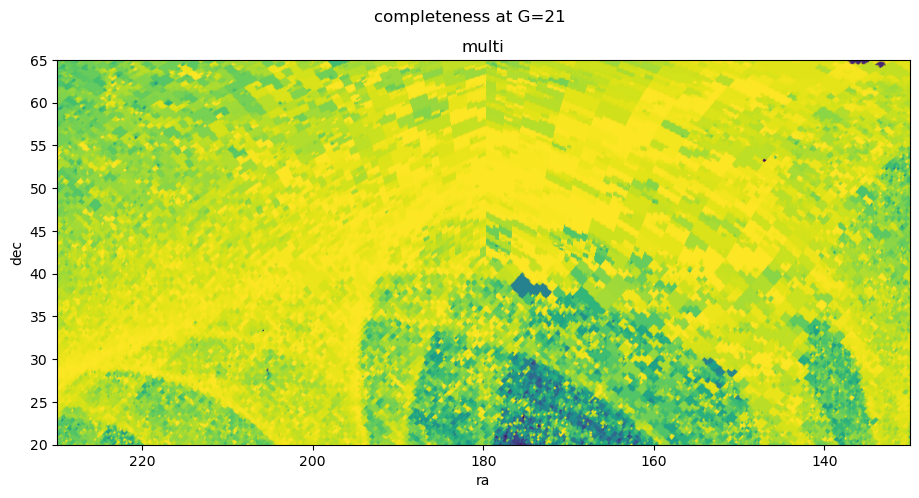

In [10]:
#Define grid of points to evaluate completeness:
xx =[]
yy =[]
for rr in np.linspace( 130 , 230 , 1000 ):
    for dd in np.linspace( 20 , 65 , 1000 ):
        xx.append(rr)
        yy.append(dd)
cc = SkyCoord(ra=xx*u.degree, dec=yy*u.degree)

#Magnitude (same for all points here):
gmag = np.ones_like(cc) * 21

completenessMultiOrder = mapMulti.query( cc , gmag )
# completenessHpx7 = mapHpx7.query( cc , gmag )

plt.figure(figsize=(11,5))

plt.subplot(111)
plt.title('multi')
plt.scatter( xx , yy , c=completenessMultiOrder, s=10, vmin=0.,vmax=1 , cmap='viridis')
plt.xlabel('ra'); plt.ylabel('dec')
plt.xlim(230,130); plt.ylim(20,65)
# plt.subplot(122)
# plt.title('hpx7')
# plt.scatter( xx , yy , c=completenessHpx7, s=10, vmin=0.,vmax=1 , cmap='viridis')
# plt.xlabel('ra'); plt.ylabel('dec')
# plt.xlim(203,198); plt.ylim(-49,-46)

plt.suptitle('completeness at G=21');
plt.show()

In [38]:
import astropy.coordinates as ac

phi1s =[]
phi2s =[]
for p1 in np.arange(-100 , 20, 0.2):
    for p2 in np.arange( -10 , 10 , 0.2):
        phi1s.append(p1)
        phi2s.append(p2)

gd1_coord = gc.GD1Koposov10(phi1=phi1s*u.deg, phi2=phi2s*u.deg)
gd1_cc = SkyCoord(gd1_coord.transform_to(ac.ICRS))
gd1_cc

<SkyCoord (ICRS): (ra, dec) in deg
    [(124.90645851, -19.95520313), (124.71896078, -19.8607532 ),
     (124.53168644, -19.76610744), ..., (246.91235051,  66.57435171),
     (247.15073685,  66.75065255), (247.39255899,  66.92658849)]>

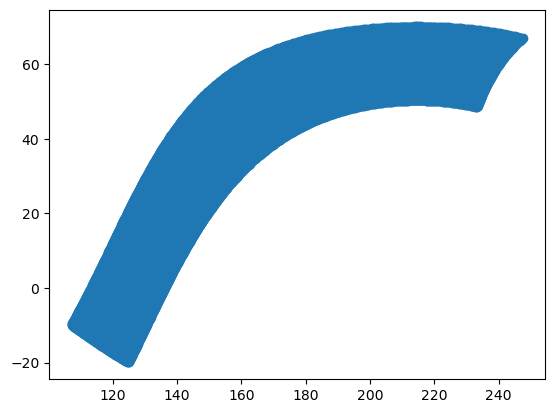

In [40]:
plt.scatter(gd1_cc.ra, gd1_cc.dec)#, c=mapMulti.query(gd1_cc, 21), s=10, vmin=0.,vmax=1 , cmap='viridis')

In [53]:
#Magnitude (same for all points here):
gmag = np.ones_like(gd1_cc) * 20.5

completenessMultiOrder = mapMulti.query( gd1_cc , gmag )

coord_gd1 = coord.transform_to(gc.GD1Koposov10)

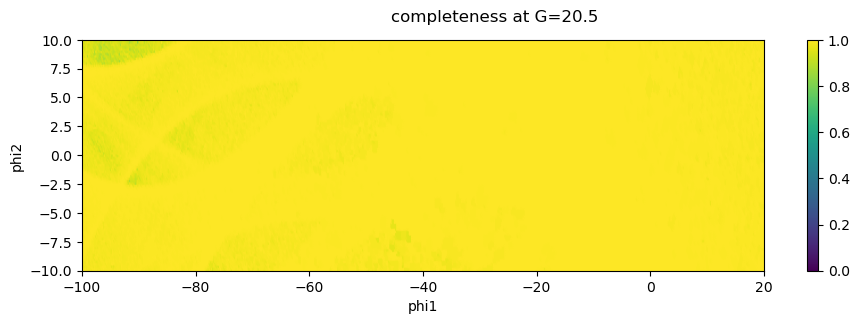

In [55]:
plt.figure(figsize=(11,3))

plt.subplot(111)
plt.scatter( coord_gd1.phi1 , coord_gd1.phi2 , c=completenessMultiOrder, s=10, vmin=0.,vmax=1 , cmap='viridis')
plt.xlabel('phi1'); plt.ylabel('phi2')
plt.xlim(-100,20); plt.ylim(-10,10)
plt.colorbar()
# plt.subplot(122)
# plt.title('hpx7')
# plt.scatter( xx , yy , c=completenessHpx7, s=10, vmin=0.,vmax=1 , cmap='viridis')
# plt.xlabel('ra'); plt.ylabel('dec')
# plt.xlim(203,198); plt.ylim(-49,-46)

plt.suptitle('completeness at G=20.5');
plt.show()

In [13]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import gala.coordinates as gc

# Create a SkyCoord object
coord = SkyCoord(ra=xx *u.deg, dec=yy*u.deg, frame='icrs')

# Convert to GD-1 coordinates
coord_gd1 = coord.transform_to(gc.GD1Koposov10)

# Print the GD-1 coordinates
print(coord_gd1)


<SkyCoord (GD1Koposov10): (phi1, phi2) in deg
    [(-62.62006722, 5.32584594), (-62.58078641, 5.34819372),
     (-62.54150273, 5.370539  ), ..., ( 13.85563018, 5.40354989),
     ( 13.84514848, 5.44736966), ( 13.83466526, 5.49118925)]>
